In [79]:
import numpy as np
with open('valid_logits.txt', 'r') as f:
    str=f.read()
    str = [s.split(',') for s in str.split('\n')]

logits_np = np.array([[float(x) for x in y] for y in str], dtype= np.float32)

In [80]:
with open('valid_labels.txt', 'r') as f:
    str = f.read()
labels_np = np.array([int(s) for s in str.split('\n')], dtype=np.int32)

In [81]:
from recalibration import *
from calibration_library import metrics
uncalibrated = np.array([np.exp(x)/np.sum(np.exp(x)) for x in logits_np], dtype=np.float32)
cnt = 0
for i, p in enumerate(uncalibrated):
    if np.argmax(p) == labels_np[i]:
        cnt+=1
print('accr : ', cnt/len(uncalibrated))

accr :  0.9942075623491553


In [82]:
#tempcel = TemperatureScailing(logits_np, labels_np)
#tempcel.fit_temperature(0.01, 100)

In [83]:
ece = metrics.ECELoss()
Histo = HistogramBinning(logits_np, labels_np, 50)
Histo.fit_histogram()
print(Histo.histBin)
calibrated = Histo.calibrate()
#calibrated = np.array([np.exp(x/temp)/np.sum(np.exp(x/temp)) for x in logits_np], dtype=np.float32)
#calibrated = tempcel.calibrate()
print(ece.loss(uncalibrated, labels_np, 15, False), ece.loss(calibrated, labels_np, 15, False))
#print(uncalibrated[178])

[[1.3116044e-04 1.2500000e-01 0.0000000e+00 0.0000000e+00 4.0000001e-01
  0.0000000e+00 0.0000000e+00 3.3333334e-01 4.0000001e-01 0.0000000e+00
  6.6666669e-01 5.0000000e-01 6.6666669e-01 7.1428573e-01 9.9040306e-01]
 [1.2723892e-03 1.5000001e-01 1.6666667e-01 5.0000000e-01 4.0000001e-01
  5.0000000e-01 4.2857143e-01 3.3333334e-01 7.5000000e-01 6.0000002e-01
  2.5000000e-01 3.3333334e-01 6.0000002e-01 9.1666669e-01 9.6904027e-01]
 [1.0726126e-03 2.6086956e-01 5.0000000e-01 5.0000000e-01 5.0000000e-01
  3.3333334e-01 5.0000000e-01 5.7142860e-01 3.3333334e-01 5.0000000e-01
  5.0000000e-01 1.0000000e+00 7.5000000e-01 6.9999999e-01 9.2990655e-01]
 [2.7995522e-03 0.0000000e+00 2.0000000e-01 0.0000000e+00 1.0000000e+00
  2.5000000e-01 3.6363637e-01 0.0000000e+00 2.0000000e-01 1.0000000e+00
  5.5555558e-01 7.5000000e-01 3.3333334e-01 5.5555558e-01 9.9880201e-01]
 [3.5813122e-04 3.0000001e-01 3.7500000e-01 3.3333334e-01 6.0000002e-01
  0.0000000e+00 1.0000000e+00 1.0000000e+00 6.6666669e-01 1.

In [72]:
mce = metrics.MCELoss()
print(mce.loss(uncalibrated, labels_np, 15, False), mce.loss(calibrated, labels_np, 15, False))
print(uncalibrated[178])

0.34861040115356445 0.2594378590583801
[1.1855407e-06 3.1328495e-06 4.1794638e-07 9.9998212e-01 8.2070670e-07
 1.2289600e-05]


In [73]:
sce = metrics.SCELoss()
print(sce.loss(uncalibrated, labels_np, 15, False), sce.loss(calibrated, labels_np, 15, False))
print(uncalibrated[178])

0.8327181046112023 0.831759514137366
[1.1855407e-06 3.1328495e-06 4.1794638e-07 9.9998212e-01 8.2070670e-07
 1.2289600e-05]


In [74]:
ace = metrics.ACELoss()
print(ace.loss(uncalibrated, labels_np, 15, False), ace.loss(calibrated, labels_np, 15, False))


0.8315484537618604 0.8313703417827919


In [75]:
from copy import deepcopy
tmp = deepcopy(uncalibrated)
tmplb = deepcopy(labels_np)
tmpca = deepcopy(calibrated)
tace = metrics.TACELoss()
print(tace.loss(tmp, tmplb, logits = False), tace.loss(tmpca, labels_np, logits = False))
print(uncalibrated[178])

0.0018545348460759328 0.014809561610445639
[1.1855407e-06 3.1328495e-06 4.1794638e-07 9.9998212e-01 8.2070670e-07
 1.2289600e-05]


In [76]:
print(ece.bin_acc)
print(tace.bin_acc)

[0.         0.         0.         0.         0.33333333 0.6
 0.41935484 0.55319149 0.525      0.65789474 0.88       0.703125
 0.82758621 0.91284404 0.99878513]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.92580645]


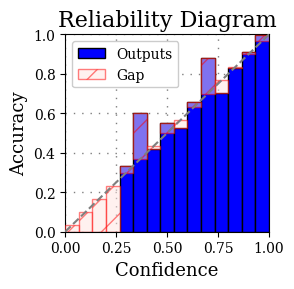

In [77]:
p = draw_rel_diagram(ece.bin_acc, 15, 'Reliability Diagram')
p.savefig('output.png')

In [78]:
print(tempcel.optim_temp)

1.991822361946106
